### Importing packages

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [122]:
data_df = data_df.iloc[:-2,:11]
data_df = data_df.append(test_data.iloc[:-1,:], ignore_index=True)

In [123]:
data_df.tail(30)

,order_date,new_customers,number_of_orders,total_delivery_charged,delivery_discount,total_revenue,reported_transactions,reported_revenue_local,cost_local,net_revenue,gross_total_revenue
3617,2020-05-02,17653.0,88923,307345.713700,95366.2819,4.226957e+06,0.0,0.0,0.0,0.0,4.226957e+06
3618,2020-05-03,11439.0,65103,227465.912200,64630.5954,2.848925e+06,0.0,0.0,0.0,0.0,2.848925e+06
3619,2020-05-04,2399.0,15733,57436.051900,14259.7741,6.725879e+05,0.0,0.0,0.0,0.0,6.725879e+05
3620,2020-05-05,3415.0,23864,86610.935200,22357.9587,1.019501e+06,0.0,0.0,0.0,0.0,1.019501e+06
3621,2020-05-06,4168.0,28109,99837.782500,27019.4285,1.209558e+06,0.0,0.0,0.0,0.0,1.209558e+06
3622,2020-05-07,5193.0,27154,91271.251800,32497.4678,1.191129e+06,0.0,0.0,0.0,0.0,1.191129e+06
3623,2020-05-08,11878.0,65596,220643.018200,77970.4896,3.102164e+06,0.0,0.0,0.0,0.0,3.102164e+06
3624,2020-05-09,19508.0,107947,365703.456500,122065.9224,5.259688e+06,0.0,0.0,0.0,0.0,5.259688e+06
3625,2020-05-10,16631.0,99422,354076.593900,91000.1122,4.609474e+06,0.0,0.0,0.0,0.0,4.609474e+06
3626,2020-05-11,2781.0,17673,63073.924100,17335.0860,7.633803e+05,0.0,0.0,0.0,0.0,7.633803e+05


In [124]:
data_df.to_csv('Data/ARIMA_Full_Data.csv', index=False)

In [106]:
print(data_df.tail())
print(test)

     order_date  new_customers  number_of_orders  total_delivery_charged  \
3627 2020-05-12         3443.0             25284            89056.801200   
3628 2020-05-13         5358.0             30942           106161.931800   
3629 2020-05-14         5606.0             32082           105890.612900   
3630 2020-05-15        13834.0             69792           244455.339800   
3631 2020-05-16        25067.0            127158           451743.819699   

      delivery_discount  total_revenue  reported_transactions  \
3627         25531.4190   1.084651e+06                    0.0   
3628         33652.7618   1.322403e+06                    0.0   
3629         39152.0183   1.408149e+06                    0.0   
3630         75181.8005   3.248028e+06                    0.0   
3631        127835.9921   6.064646e+06                    0.0   

      reported_revenue_local  cost_local  net_revenue  gross_total_revenue  
3627                     0.0         0.0          0.0         1.084651e+06 

In [119]:
data_df = pd.read_csv('Data/Consolidated_Ze_Data.csv')
data_df.rename(columns = {"Unnamed: 0": "order_date"}, inplace=True)
data_df['order_date'] = pd.to_datetime(data_df['order_date'])
data_df.head()

,order_date,new_customers,number_of_orders,total_delivery_charged,delivery_discount,total_revenue,reported_transactions,reported_revenue_local,cost_local,net_revenue,...,Independência do Brasil,Nossa Senhora Aparecida,Finados,Proclamação da República,Natal,Sexta-feira Santa,Páscoa,Corpus Christi,Quarta-feira de cinzas (Início da Quaresma),Carnaval
0,2016-02-10,1.0,5,25.0,0.0,391.72,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,2016-02-11,1.0,2,18.0,0.0,169.24,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2016-02-12,0.0,1,9.0,0.0,58.88,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2016-02-13,1.0,1,9.0,0.0,99.80,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,2016-02-15,0.0,4,24.0,0.0,710.35,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data_df.columns

Index(['order_date', 'new_customers', 'number_of_orders',
       'total_delivery_charged', 'delivery_discount', 'total_revenue',
       'reported_transactions', 'reported_revenue_local', 'cost_local',
       'net_revenue', 'gross_total_revenue', 'Ano novo', 'Tiradentes',
       'Dia Mundial do Trabalho', 'Independência do Brasil',
       'Nossa Senhora Aparecida', 'Finados', 'Proclamação da República',
       'Natal', 'Sexta-feira Santa', 'Páscoa', 'Corpus Christi',
       'Quarta-feira de cinzas (Início da Quaresma)', 'Carnaval'],
      dtype='object')

In [5]:
order_df = data_df.iloc[:,:11]
order_df.head()

,order_date,new_customers,number_of_orders,total_delivery_charged,delivery_discount,total_revenue,reported_transactions,reported_revenue_local,cost_local,net_revenue,gross_total_revenue
0,2016-02-10,1.0,5,25.0,0.0,391.72,0.0,0.0,0.0,0.0,391.72
1,2016-02-11,1.0,2,18.0,0.0,169.24,0.0,0.0,0.0,0.0,169.24
2,2016-02-12,0.0,1,9.0,0.0,58.88,0.0,0.0,0.0,0.0,58.88
3,2016-02-13,1.0,1,9.0,0.0,99.80,0.0,0.0,0.0,0.0,99.80
4,2016-02-15,0.0,4,24.0,0.0,710.35,0.0,0.0,0.0,0.0,710.35


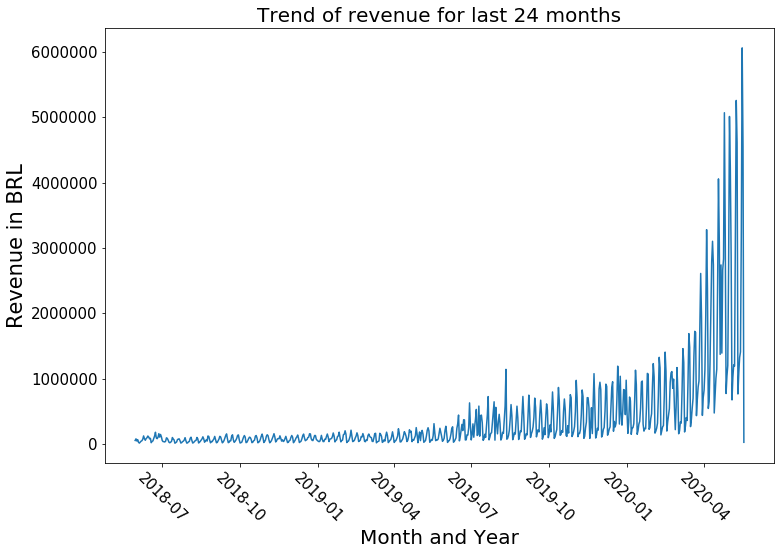

In [6]:
ax = plt.figure(figsize=(12,8))
plt.plot(data_df.order_date[-720:], data_df.gross_total_revenue[-720:])
plt.xticks(rotation=-45, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Month and Year', fontsize=20)
plt.ylabel('Revenue in BRL', fontsize=21)
plt.title('Trend of revenue for last 24 months', fontsize=20)
plt.show()

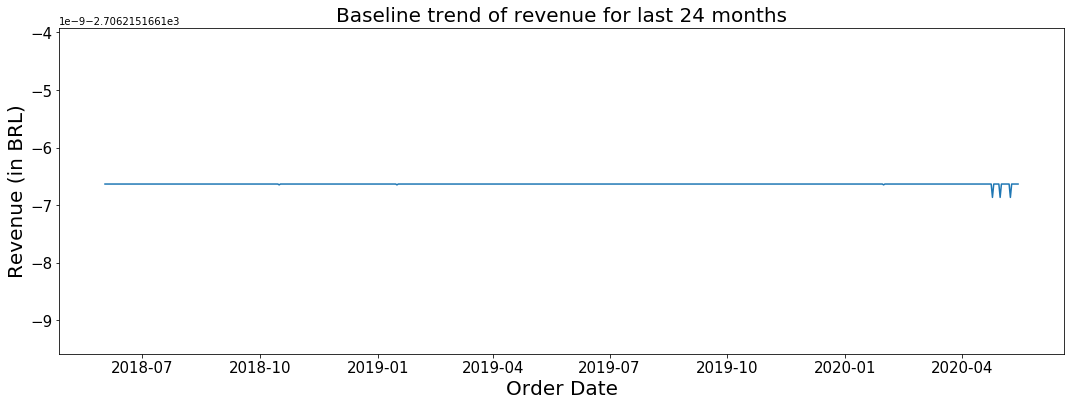

In [362]:
orig_data = data_df.gross_total_revenue[-720:]
orig_data.index = data_df.order_date[-720:]
decomposition = seasonal_decompose(orig_data, model = 'additive', period=7) 
ax = plt.figure(figsize=(18,6))
# decomposition.plot()
# (decomposition.trend + decomposition.seasonal).plot()
resid = data_df.gross_total_revenue[-720:].values - decomposition.trend - decomposition.seasonal
man = decomposition.resid.mean()
resid = pd.Series(resid).dropna().subtract(man)
# plt.plot(data_df.order_date[-720:], data_df.gross_total_revenue[-720:], color='red')
plt.plot(decomposition.resid - resid)
# decomposition.resid.plot(color='red')
plt.title('Baseline trend of revenue for last 24 months', fontsize=20)
plt.xlabel('Order Date', fontsize=20)
plt.ylabel('Revenue (in BRL)', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

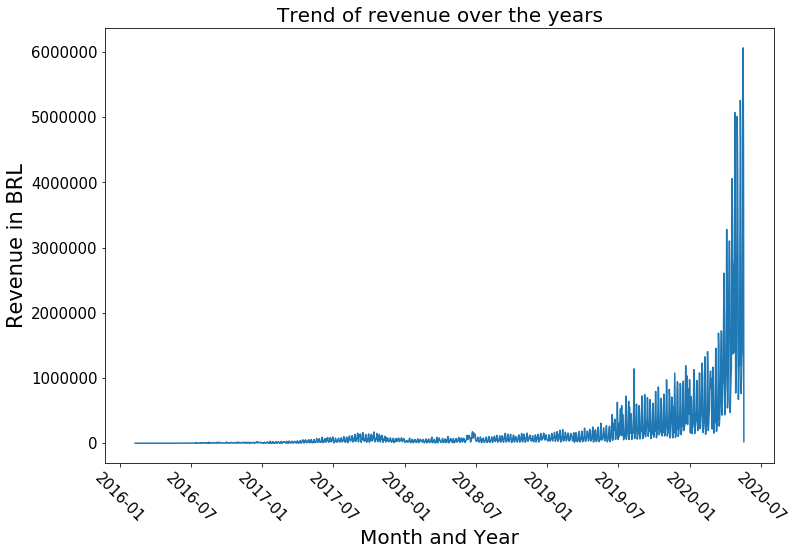

In [289]:
ax = plt.figure(figsize=(12,8))
plt.plot(data_df.order_date, data_df.gross_total_revenue)
plt.xticks(rotation=-45, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Month and Year', fontsize=20)
plt.ylabel('Revenue in BRL', fontsize=21)
plt.title('Trend of revenue over the years', fontsize=20)
plt.show()

## Building the ARIMA Model

In [7]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

In [34]:
data_df = data_df.iloc[:-1,:]

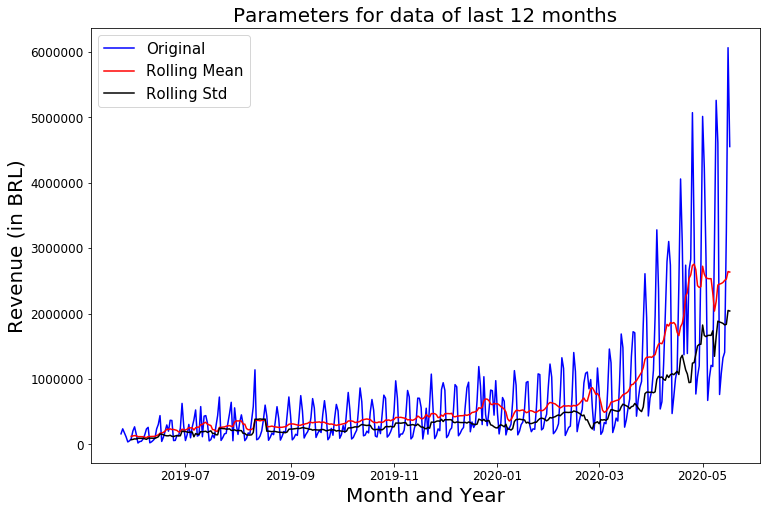

In [9]:
rolling_mean = data_df.gross_total_revenue[-360:].rolling(window = 7).mean()
rolling_mean.index = data_df.order_date[-360:]
rolling_std = data_df.gross_total_revenue[-360:].rolling(window = 7).std()
rolling_std.index = data_df.order_date[-360:]
ax = plt.figure(figsize=(12,8))
plt.plot(data_df.order_date[-360:], data_df.gross_total_revenue[-360:], color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.ylabel('Revenue (in BRL)', fontsize=20)
plt.xlabel('Month and Year', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc = 'best', fontsize=15)
plt.title('Parameters for data of last 12 months', fontsize=20)
plt.show()

### Testing Stationarity using AD-Fuller test

In [107]:
result = adfuller(data_df.gross_total_revenue[-360:])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: 0.9457417510953376
p-value: 0.993659154640693
Critical Values:
	1%: -3.4496162602188187
	5%: -2.870028369720798
	10%: -2.5712922615505627


> ADF Statistic > Critical values => Not stationary <br/>
> p-value > Threshold of 0.05 => Not stationary

### Testing Stationarity using KPSS test

In [128]:
result = kpss(data_df.gross_total_revenue[-360:])
print('KPSS Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[3].items():
    print('\t{}: {}'.format(key, value))

KPSS Statistic: 1.3436909662205665
p-value: 0.01
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


c:\program files\python38\lib\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


> KPSS Statistic > Critical values => Not stationary <br/>
> p-value > Threshold of 0.05 => Not stationary

### Perform log transform

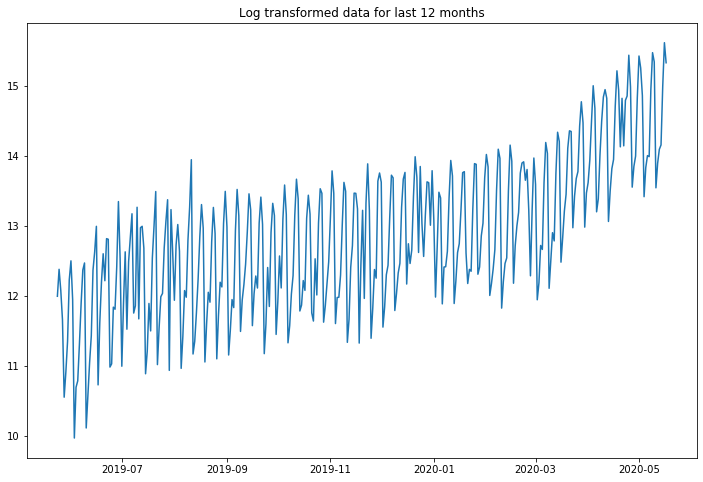

In [10]:
ax = plt.figure(figsize=(12,8))
df_log = np.log(data_df.gross_total_revenue[-360:])
plt.plot(data_df.order_date[-360:], df_log)
plt.title('Log transformed data for last 12 months')
plt.show()
#Remove -1 date

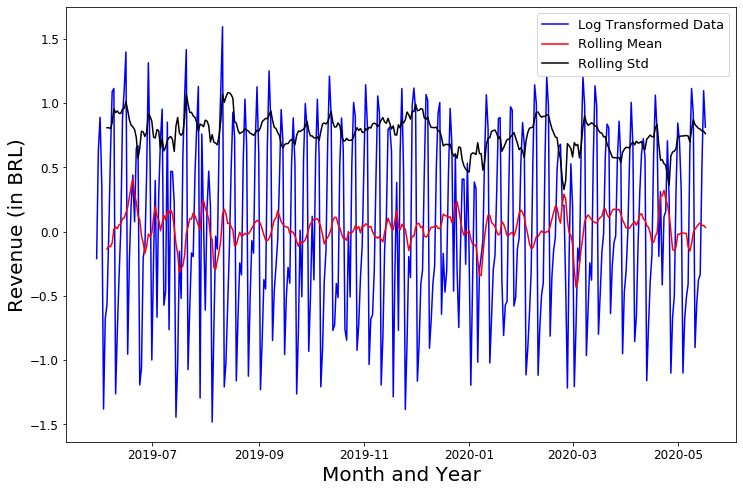

In [11]:
rolling_mean = df_log.rolling(window=7).mean()
df_log_minus_mean = df_log - rolling_mean
df_log_minus_mean.dropna(inplace=True)

rolling_mean = df_log_minus_mean.rolling(window = 7).mean()
rolling_mean.index = data_df.order_date[-354:]
rolling_std = df_log_minus_mean.rolling(window = 7).std()
rolling_std.index = data_df.order_date[-354:]
ax = plt.figure(figsize=(12,8))
plt.plot(data_df.order_date[-354:], df_log_minus_mean, color = 'blue', label = 'Log Transformed Data')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.ylabel('Revenue (in BRL)', fontsize=20)
plt.xlabel('Month and Year', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc = 'best', fontsize=13)
# plt.title('Parameters for data of last 12 months', fontsize=20)
plt.show()

In [135]:
result = adfuller(df_log_minus_mean)
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -6.074008992754115
p-value: 1.1329746698249976e-07
Critical Values:
	1%: -3.449962981927952
	5%: -2.870180642420163
	10%: -2.5713734527352607


> ADF Statistic < Critical values => Stationary !!

### Perform differencing

<Figure size 864x576 with 0 Axes>

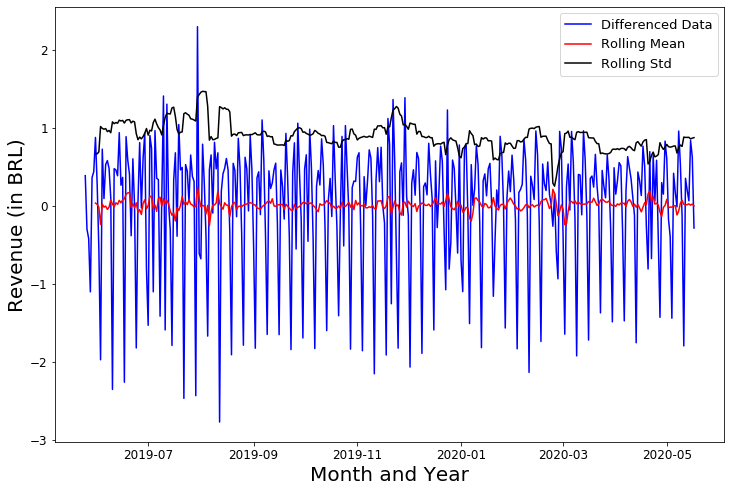

In [29]:
ax = plt.figure(figsize=(12,8))
df_log_shift = df_log - df_log.shift(1)
df_log_shift.dropna(inplace=True)

rolling_mean = df_log_shift.rolling(window = 7).mean()
rolling_mean.index = data_df.order_date[-359:]
rolling_std = df_log_shift.rolling(window = 7).std()
rolling_std.index = data_df.order_date[-359:]
ax = plt.figure(figsize=(12,8))
plt.plot(data_df.order_date[-359:], df_log_shift, color = 'blue', label = 'Differenced Data')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
# plt.title('Rolling mean & standard deviation')
plt.ylabel('Revenue (in BRL)', fontsize=20)
plt.xlabel('Month and Year', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc = 'best', fontsize=13)
# plt.title('Parameters for data of last 12 months', fontsize=20)
plt.show()

In [139]:
result = adfuller(df_log_shift)
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -6.904732899757521
p-value: 1.255693907344868e-09
Critical Values:
	1%: -3.4494474563375737
	5%: -2.8699542285903887
	10%: -2.5712527305187987


> ADF Statistic < Critical values => Stationary !!

In [14]:
max(data_df.order_date)

Timestamp('2020-05-17 00:00:00')

In [102]:
test_data = pd.read_csv('Data/Ze-consolidated-Jun-01-2020.csv')
test_data.rename(columns = {"Unnamed: 0": "order_date"}, inplace=True)
test_data['order_date'] = pd.to_datetime(test_data['order_date'])
test_data.sort_values(by = 'order_date', inplace=True)
test_data.index = test_data.order_date
test_data.head()

,order_date,new_customers,number_of_orders,total_delivery_charged,delivery_discount,total_revenue,reported_transactions,reported_revenue_local,cost_local,net_revenue,gross_total_revenue
order_date,,,,,,,,,,,
2020-05-17,2020-05-17,18513,102901,373499.9152,89105.8042,4.518575e+06,0.0,0.0,0.0,0.0,4.518575e+06
2020-05-18,2020-05-18,2893,18131,66704.8204,15852.9985,7.575857e+05,0.0,0.0,0.0,0.0,7.575857e+05
2020-05-19,2020-05-19,4044,27962,102008.3455,25800.0699,1.196450e+06,0.0,0.0,0.0,0.0,1.196450e+06
2020-05-20,2020-05-20,6724,38787,138947.7649,37493.5266,1.685506e+06,0.0,0.0,0.0,0.0,1.685506e+06
2020-05-21,2020-05-21,8866,52622,188172.3939,47098.4574,2.398436e+06,0.0,0.0,0.0,0.0,2.398436e+06


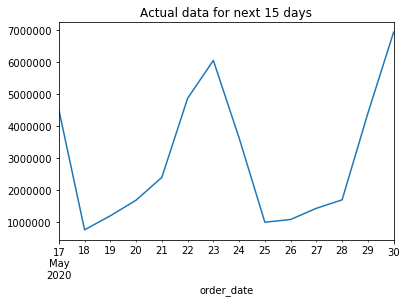

In [24]:
test_data = test_data.iloc[:-1, :]
test_data['gross_total_revenue'].plot()
plt.title('Actual data for next 15 days')
plt.show()

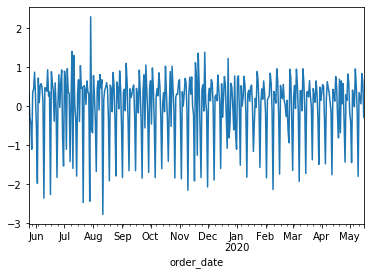

In [38]:
df_log_shift.index = data_df.order_date[-359:]
df_log_shift.plot()

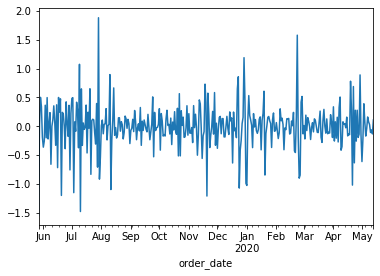

In [45]:
decomp = seasonal_decompose(df_log_shift, model = 'additive', period=7) 
df_log_shift_resid = decomp.resid.dropna()
df_log_shift_resid.plot()

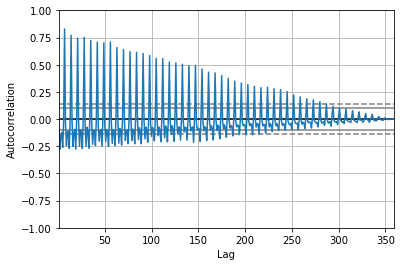

In [53]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_log_shift)

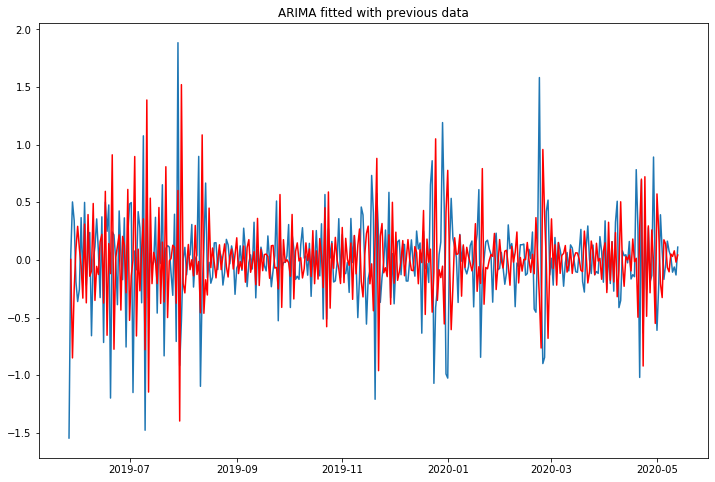

In [97]:
model = ARIMA(endog = df_log_shift_resid, order=(1,1,0), freq='D')
results = model.fit(disp=False)
ax = plt.figure(figsize=(12,8))
plt.plot(df_log_shift_resid)
plt.plot(results.fittedvalues, color='red')
plt.title('ARIMA fitted with previous data')
plt.show()

In [98]:
print(results.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.resid   No. Observations:                  352
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -265.746
Method:                       css-mle   S.D. of innovations              0.515
Date:                Mon, 01 Jun 2020   AIC                            537.492
Time:                        19:57:56   BIC                            549.082
Sample:                    05-28-2019   HQIC                           542.104
                         - 05-13-2020                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0029      0.018      0.162      0.871      -0.032       0.038
ar.L1.D.resid    -0.5412      0.045    -11.956      0.000      -0.630      -0.453
                                    Root

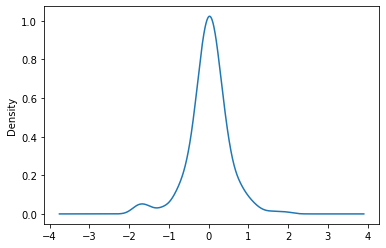

In [99]:
results.resid.plot(kind='kde')

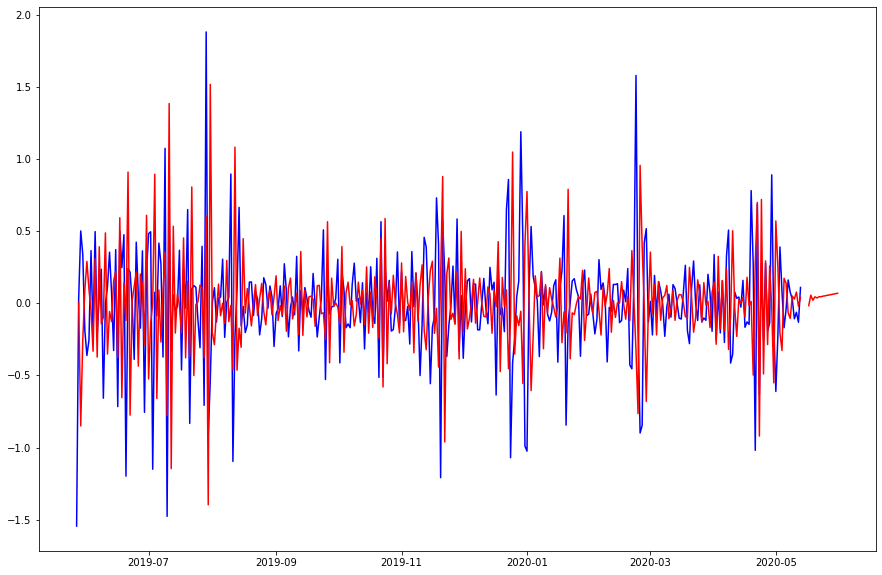

In [100]:
# preds = results.predict(start='2020-05-17', end='2020-05-31')
preds = results.forecast(steps=15)[0]
pred_df = pd.DataFrame(columns=['output'], index=pd.date_range(start='2020-05-17', end='2020-05-31'))
pred_df['output'] = preds
fig = plt.figure(figsize=(15,10))
plt.plot(pred_df['output'], color='red')
plt.plot(df_log_shift_resid, color='blue')
plt.plot(results.fittedvalues, color='red')
# preds

In [162]:
r2_score(df_log_shift, results.fittedvalues)

0.45281352261308705

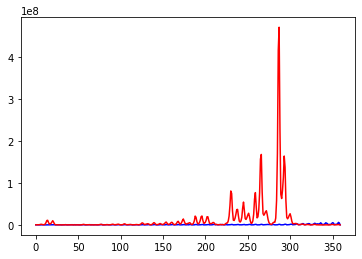

In [172]:
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(df_log.iloc[0], index=df_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
orig_data = data_df.gross_total_revenue[-360:]
orig_data.index = predictions_ARIMA.index
plt.plot(df_loh, color='blue')
plt.plot(predictions_ARIMA, color='red')
# Wrong -> look into it

In [179]:
df_log.index = data_df.order_date[-360:]
df_log

order_date
2019-05-25    12.382048
2019-05-26    12.081200
2019-05-27    11.661254
2019-05-28    10.555838
2019-05-29    10.916411
                ...    
2020-05-14    14.157787
2020-05-15    14.993559
2020-05-16    15.617987
2020-05-17    15.331359
2020-05-18    10.059532
Name: gross_total_revenue, Length: 360, dtype: float64

In [190]:
orig_data = data_df.gross_total_revenue[-360:]
orig_data.index = data_df.order_date[-360:]
orig_data

order_date
2019-05-25    2.384818e+05
2019-05-26    1.765219e+05
2019-05-27    1.159894e+05
2019-05-28    3.840096e+04
2019-05-29    5.507279e+04
                  ...     
2020-05-14    1.408149e+06
2020-05-15    3.248028e+06
2020-05-16    6.064646e+06
2020-05-17    4.553283e+06
2020-05-18    2.337757e+04
Name: gross_total_revenue, Length: 360, dtype: float64

<Figure size 1080x1080 with 0 Axes>

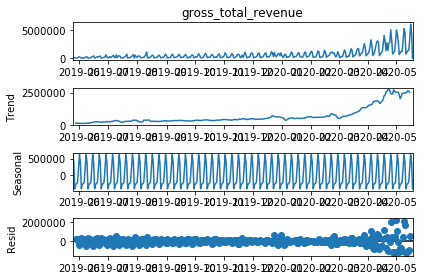

In [205]:
decomposition = seasonal_decompose(orig_data, model = 'additive', period=7) 
ax = plt.figure(figsize=(15,15))
decomposition.plot()
plt.show()

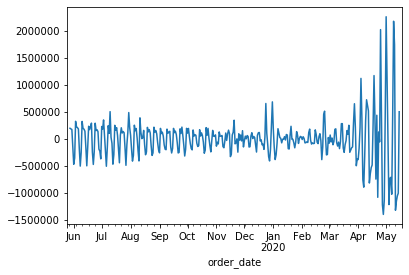

In [207]:
decomposition.resid.plot()

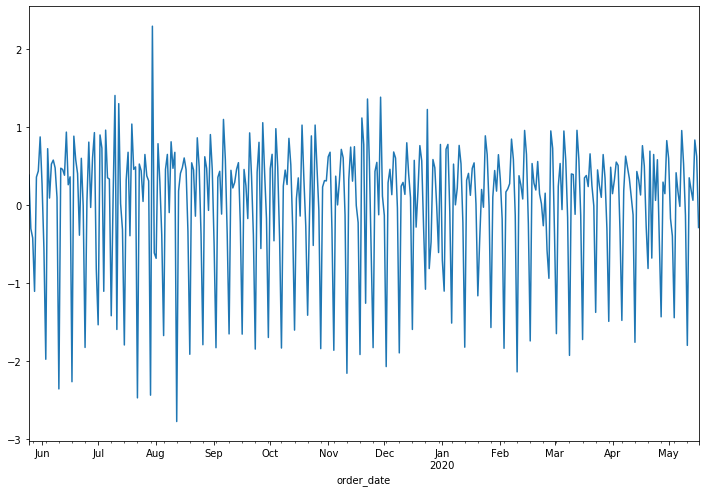

In [391]:
df_log_shift.index = data_df.order_date[-359:]
df_log_shift.plot(figsize=(12,8))

<Figure size 1440x1440 with 0 Axes>

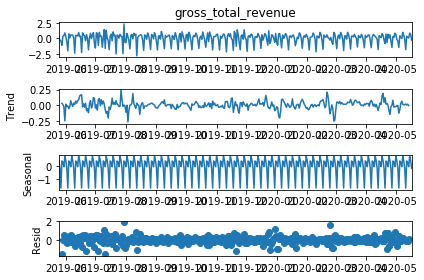

In [393]:
ax = plt.figure(figsize=(20,20))
# df_log.ind
decomposition = seasonal_decompose(df_log_shift, model = 'additive', period=7) 
decomposition.plot()
plt.show()

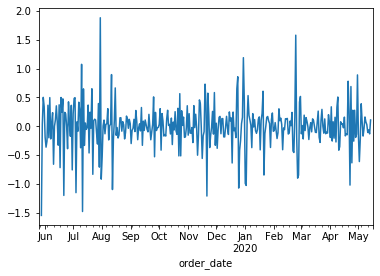

In [431]:
decomposition.resid.plot()

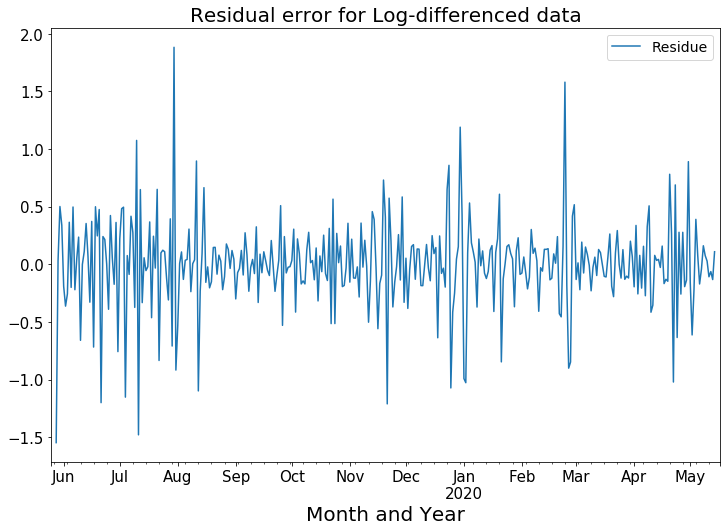

In [398]:
decomposition.resid.plot(figsize=(12,8), label='Residue')
plt.xlabel('Month and Year', fontsize=20)
plt.title('Residual error for Log-differenced data', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=14)
plt.show()

In [418]:
import holidays
br_holidays = holidays.CountryHoliday('BR', years=[2019, 2020])
br_holidays

{datetime.date(2019, 1, 1): 'Ano novo',
 datetime.date(2019, 4, 21): 'Páscoa, Tiradentes',
 datetime.date(2019, 5, 1): 'Dia Mundial do Trabalho',
 datetime.date(2019, 9, 7): 'Independência do Brasil',
 datetime.date(2019, 10, 12): 'Nossa Senhora Aparecida',
 datetime.date(2019, 11, 2): 'Finados',
 datetime.date(2019, 11, 15): 'Proclamação da República',
 datetime.date(2019, 12, 25): 'Natal',
 datetime.date(2019, 4, 19): 'Sexta-feira Santa',
 datetime.date(2019, 6, 20): 'Corpus Christi',
 datetime.date(2019, 3, 6): 'Quarta-feira de cinzas (Início da Quaresma)',
 datetime.date(2019, 3, 5): 'Carnaval',
 datetime.date(2020, 1, 1): 'Ano novo',
 datetime.date(2020, 4, 21): 'Tiradentes',
 datetime.date(2020, 5, 1): 'Dia Mundial do Trabalho',
 datetime.date(2020, 9, 7): 'Independência do Brasil',
 datetime.date(2020, 10, 12): 'Nossa Senhora Aparecida',
 datetime.date(2020, 11, 2): 'Finados',
 datetime.date(2020, 11, 15): 'Proclamação da República',
 datetime.date(2020, 12, 25): 'Natal',
 datet

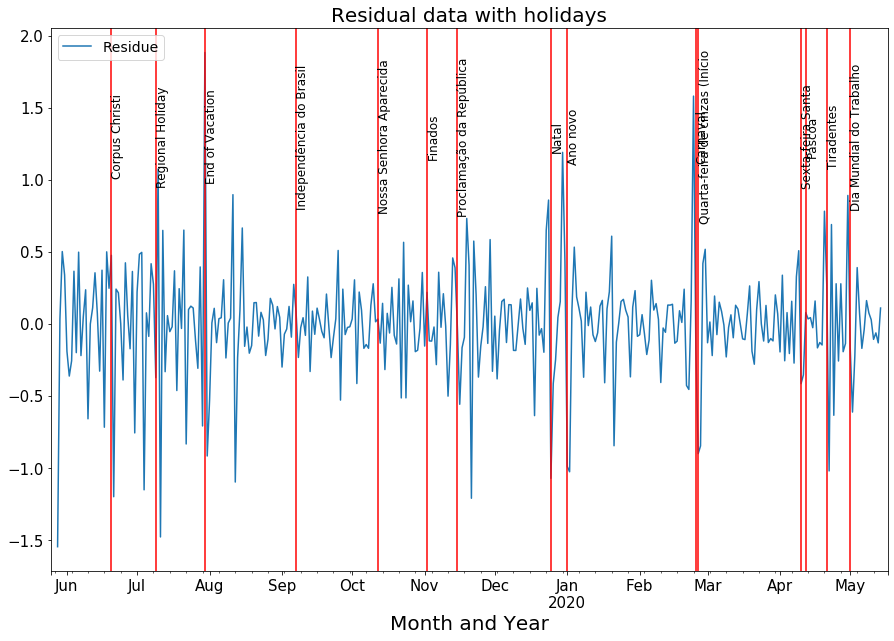

In [426]:
from matplotlib.pyplot import text

decomposition.resid.plot(figsize=(15,10), label='Residue')
plt.xlabel('Month and Year', fontsize=20)
plt.title('Residual data with holidays', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
for date, name in br_holidays.items():
    if date>decomposition.resid.index[0] and date<decomposition.resid.index[-1]:
        plt.axvline(x=date, color='red')
        text(date, 1.3, name[:30], rotation=90, verticalalignment='center', fontsize=12)
plt.axvline(x='2019-07-09', color='red')
text('2019-07-09', 1.3, 'Regional Holiday', rotation=90, verticalalignment='center', fontsize=12)
plt.axvline(x='2019-07-30', color='red')
text('2019-07-30', 1.3, 'End of Vacation', rotation=90, verticalalignment='center', fontsize=12)
plt.legend(fontsize=14)
plt.show()

In [423]:
decomposition.resid[decomposition.resid > 1.5]

order_date
2019-07-30    1.883308
2020-02-24    1.580895
Name: resid, dtype: float64

In [99]:
print(data_df.shape)
print(data_df.iloc[0,0], data_df.iloc[-1,0])
print(data_df.iloc[-1,0] - data_df.iloc[0,0])
data_df.tail(30)

(3634, 26)
2016-02-10 00:00:00 2020-05-18 00:00:00
1559 days 00:00:00


,order_date,new_customers,number_of_orders,total_delivery_charged,delivery_discount,total_revenue,reported_transactions,reported_revenue_local,cost_local,net_revenue,...,Finados,Proclamação da República,Natal,Sexta-feira Santa,Páscoa,Corpus Christi,Quarta-feira de cinzas (Início da Quaresma),Carnaval,day_of_week,is_weekend
3604,2020-04-19,13418.0,69167,257833.802600,54970.6691,3.087191e+06,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,6,1
3605,2020-04-20,6557.0,30401,114038.192000,23950.6070,1.370425e+06,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3606,2020-04-21,12395.0,60960,227122.773700,49113.9988,2.740310e+06,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3607,2020-04-22,6605.0,31974,120609.722700,24601.4067,1.389955e+06,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,2,0
3608,2020-04-23,11515.0,58222,219940.774400,43191.1363,2.663186e+06,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,3,0
3609,2020-04-24,13469.0,61460,221281.417900,59963.6207,2.831332e+06,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,4,1
3610,2020-04-25,24407.0,105527,382637.022399,96477.8180,5.071524e+06,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,5,1
3611,2020-04-26,15119.0,73369,270422.253400,61261.6100,3.227010e+06,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,6,1
3612,2020-04-27,3442.0,17329,63752.222600,14161.6600,7.708150e+05,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3613,2020-04-28,4302.0,23393,85836.871300,19791.0941,1.036155e+06,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
data_df[data_df['order_date']]

In [58]:
# pd.to_datetime().
# data_df.order_date[0].dt.dayofweek()
# start_date = pd.to_datetime(data_df.order_date.iloc[0])
# end_date = pd.to_datetime(data_df.order_date.iloc[-1])
day_range = data_df['order_date'].dt.dayofweek
day_range.shape

(3634,)

In [66]:
data_df['day_of_week'] = day_range.values
data_df['is_weekend'] = 0
data_df['is_weekend'] = np.where(data_df['day_of_week']==4, 1, data_df['is_weekend'])
data_df['is_weekend'] = np.where(data_df['day_of_week']==5, 1, data_df['is_weekend'])
data_df['is_weekend'] = np.where(data_df['day_of_week']==6, 1, data_df['is_weekend'])
data_df.head(20)

,order_date,new_customers,number_of_orders,total_delivery_charged,delivery_discount,total_revenue,reported_transactions,reported_revenue_local,cost_local,net_revenue,...,Finados,Proclamação da República,Natal,Sexta-feira Santa,Páscoa,Corpus Christi,Quarta-feira de cinzas (Início da Quaresma),Carnaval,day_of_week,is_weekend
0,2016-02-10,1.0,5,25.0000,0.0,391.72,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,2,0
1,2016-02-11,1.0,2,18.0000,0.0,169.24,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,3,0
2,2016-02-12,0.0,1,9.0000,0.0,58.88,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,4,1
3,2016-02-13,1.0,1,9.0000,0.0,99.80,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,5,1
4,2016-02-15,0.0,4,24.0000,0.0,710.35,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5,2016-02-16,0.0,3,15.0000,0.0,210.60,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
6,2016-02-17,1.0,3,23.0001,0.0,192.20,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,2,0
7,2016-02-21,0.0,3,23.0000,0.0,339.00,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,6,1
8,2016-02-22,0.0,1,5.0000,0.0,92.00,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
9,2016-02-23,0.0,1,9.0000,0.0,92.00,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0


In [74]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

y = data_df['gross_total_revenue']
X = data_df.drop(columns = ['gross_total_revenue', 'order_date'])

trX, teX, trY, teY = train_test_split(X, y, test_size=0.1, shuffle=False)
print(trX.shape, trY.shape, teX.shape, teY.shape)

(3270, 24) (3270,) (364, 24) (364,)


In [75]:
model = RandomForestRegressor(max_depth=10)
model.fit(trX, trY.values)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [79]:
y_pr = model.predict(teX)
y_pr

array([ 58596.24008979,  58041.57796103,  76492.02334965, 162378.89386446,
       248554.533752  , 182569.959627  , 115749.32022407,  38672.43552965,
        55172.44299966,  84934.03538709, 205535.359032  , 264944.508484  ,
       155299.05973683,  21384.13898525,  44355.65246428,  48511.95796977,
        82280.01352258, 146550.00625622, 261870.85178   , 232486.309841  ,
        24730.80260263,  39757.97247728,  62877.78688178,  92861.84797208,
       255889.420581  , 276005.970281  , 276005.970281  ,  45694.01453228,
       110730.22587274, 207824.479552  , 275984.341609  , 224021.894027  ,
       276005.970281  , 276005.970281  ,  59235.12779523,  62058.67132266,
       138919.56666383, 134707.49143125, 257613.261419  , 276005.970281  ,
       258656.79797   ,  59944.2261165 , 146934.31283689, 257756.572065  ,
       101152.2674712 , 258656.79797   , 276005.970281  , 276005.970281  ,
       127561.84432948, 141640.35462357, 257756.572065  , 117242.73077669,
       276005.970281  , 2

In [81]:
from sklearn.metrics import r2_score

r2_score(teY, y_pr)

-0.18357789588752338

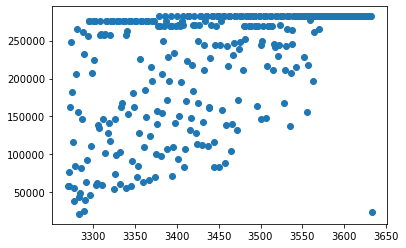

In [86]:
# teY.plot()
plt.scatter(teY.index, y_pr)
plt.show()

In [89]:
month_df = data_df.groupby(data_df['order_date'].dt.year).sum()
month_df

,new_customers,number_of_orders,total_delivery_charged,delivery_discount,total_revenue,reported_transactions,reported_revenue_local,cost_local,net_revenue,gross_total_revenue,...,Finados,Proclamação da República,Natal,Sexta-feira Santa,Páscoa,Corpus Christi,Quarta-feira de cinzas (Início da Quaresma),Carnaval,day_of_week,is_weekend
order_date,,,,,,,,,,,,,,,,,,,,,
2016,6423.0,13891,1.478981e+05,0.000000e+00,1.453633e+06,157.0,7450.8149,894.0978,6556.7171,1.460190e+06,...,1,1,1,1,1,1,1,0,970,139
2017,181869.0,500649,4.399608e+06,0.000000e+00,4.986650e+07,3958.0,325072.7658,215428.8119,109643.9539,4.997615e+07,...,1,1,1,6,6,3,25,0,7499,1080
2018,95136.0,225188,7.101566e+05,1.424816e+06,2.020031e+07,0.0,0.0000,0.0000,0.0000,2.020031e+07,...,1,1,1,1,1,1,1,0,1092,156
2019,345311.0,1651140,4.706620e+06,2.311963e+06,8.830912e+07,0.0,0.0000,0.0000,0.0000,8.830912e+07,...,1,1,1,1,1,1,1,0,1093,156
2020,722727.0,3690636,1.290426e+07,3.614034e+06,1.708413e+08,0.0,0.0000,0.0000,0.0000,1.708413e+08,...,0,0,0,1,1,0,1,0,419,60


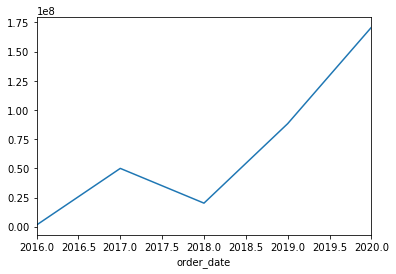

In [90]:
month_df['gross_total_revenue'].plot()

In [1]:
df_log_shift

NameError: name 'df_log_shift' is not defined